# **CSCI 500 - Data Science with Python:** <br> Simulation and Static (Non-Animated) Visualizations

**PLEASE TAKE NOTE: In this notebook, all the code that affects the visualization's appearance must appear in the same cell. Any code that modifies that appearance would have to re-display the visualization.**

* Visualizations help you “get to know” your data. 
* Give you a powerful way to understand data that goes beyond simply looking at raw data.
* The **Seaborn visualization library** is built over the **Matplotlib visualization library** and simplifies many Matplotlib operations. 

## Sample Graphs for 600, 60,000 and 6,000,000 Die Rolls
* A vertical bar chart that for 600 die rolls summarizes the frequencies with which each of the six faces appear, and their percentages of the total.
* Seaborn refers to this type of graph as a **bar plot**: 

![Screen capture of a vertical bar chart for 600 die rolls summarizing the frequencies with which each of the six faces appear, and their percentages of the total](lists_and_tuples_images/Seaborn_01.png "Screen capture of a vertical bar chart for 600 die rolls summarizing the frequencies with which each of the six faces appear, and their percentages of the total")

* Expect about 100 occurrences of each die face. 
* For a small number of rolls, none of the frequencies is exactly 100 and most of the percentages are not close to 16.667% (about 1/6th). 
* For 60,000 die rolls, the bars will become much closer in size. 
* At 6,000,000 die rolls, they’ll appear to be exactly the same size.
* “Law of large numbers” at work. 

* The first screen capture below shows the results for 60,000 die rolls—expect about 10,000 of each face. 
* The second screen capture below shows the results for 6,000,000 rolls—expect about 1,000,000 of each face
* With more die rolls, the frequency percentages are much closer to the expected 16.667%.

![Screen capture of a vertical bar chart for 60,000 die rolls summarizing the frequencies with which each of the six faces appear, and their percentages of the total](lists_and_tuples_images/Seaborn_02.png "Screen capture of a vertical bar chart for 60,000 die rolls summarizing the frequencies with which each of the six faces appear, and their percentages of the total")

![Screen capture of a vertical bar chart for 6,000,000 die rolls summarizing the frequencies with which each of the six faces appear, and their percentages of the total](lists_and_tuples_images/Seaborn_03.png "Screen capture of a vertical bar chart for 6,000,000 die rolls summarizing the frequencies with which each of the six faces appear, and their percentages of the total")
 

## Visualizing Die-Roll Frequencies and Percentages

### Launching IPython for Interactive Matplotlib Development
* To enable IPython's built-in support for interactively developing Matplotlib graphs:

```python
ipython --matplotlib
```

### Importing the Libraries
**Note: `%matplotlib inline` is an IPython magic that enables Matplotlib-based graphics to be displayed directly in the notebook. We've separated by two blank lines the snippets that were combined into a single cell.**

In [1]:
# anything starting with % in iPython is a "magic function/command"
%matplotlib inline
import matplotlib.pyplot as plt # this is the conventionally used alias

In [2]:
import numpy as np

In [3]:
import random

In [4]:
import seaborn as sns 

1. **`matplotlib.pyplot`** contains the Matplotlib library’s graphing capabilities that we use. This module typically is imported with the name `plt`. 
2. NumPy (**Num**erical **Py**thon) library includes the function `unique` that we’ll use to summarize the die rolls. The **`numpy` module** typically is imported as `np`. 
3. `random` contains Python’s random-number generation functions.
4. **`seaborn`** contains the Seaborn library’s graphing capabilities we use. This module typically is imported with the name `sns`. 

### Rolling the Die and Calculating Die Frequencies

In [10]:
rolls = [ random.randrange(1, 7) for i in range(600) ]

* NumPy's **`unique` function** expects an `ndarray` argument and returns an `ndarray`. 
* If you pass a list, NumPy converts it to an `ndarray` for better performance. 
* Keyword argument **`return_counts`**`=True` tells `unique` to count each unique value’s number of occurrences
* In this case, `unique` returns a **tuple of two one-dimensional `ndarray`s** containing the **sorted unique values** and their corresponding frequencies, respectively. 

In [6]:
values, frequencies = np.unique( rolls, return_counts = True )

In [ ]:
values

In [ ]:
frequencies

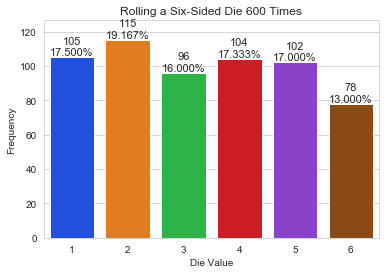

In [7]:
"""
Creating the Initial Bar Plot:

Let's create the bar plot's title, set its style, and 
then graph the die faces and frequencies
"""
# note that the following f-string will include
# the number of die rolls directly in the bar plot's
# title, and the use of a comma format specifier will
# display the number with thousands separators (so that
# a number like 60000 will be displayed as `60,000`)
title = f'Rolling a Six-Sided Die {len(rolls):,} Times' # the :, is the format specifier for thousands

# for other options, see: 
# https://seaborn.pydata.org/generated/seaborn.set_style.html
sns.set_style('whitegrid')


# create and display the bar plot
# see: https://seaborn.pydata.org/generated/seaborn.barplot.html
axes = sns.barplot( x=values, y=frequencies, palette='bright' )


"""
Setting the Window Title and Labeling the x- and y-Axes:

The next two statements add some descriptive text to
the bar plot...
"""
# set the title of the plot (set_title is a *method*
# of the axes object)
axes.set_title(title)

# label the axes
axes.set( xlabel='Die Value', ylabel='Frequency' )


"""
Finalizing the Bar Plot:

The next two statements complete the graph by making 
room for the text above each bar and then displaying it.
"""
# scale the y-axis (by 10%) to add room for text above bars
# (That is, the y-axis is 10% taller than whatever is the
#  height of the tallest plotted bar)
axes.set_ylim( top=max(frequencies) * 1.10 )

# create and display the text for each bar
# (The `patches` collection of the `axes` object contains 
#  2-D colored shapes that represent the plot's bars. 
#  The `for` statement uses `zip` to iterate through the 
#  `patches` and their corresponding `frequency` values.
#  Each iteration unpacks the tuple returned by `zip`
#  into `bar` and `frequency`. To see the official Matplotlib
#  documentation for the properties and methods of Rectangular `patches`, see:
#  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html
for bar, frequency in zip(axes.patches, frequencies):
    text_x = ( bar.get_x() ) + ( bar.get_width() / 2.0 )
    text_y = bar.get_height() 
    text = f'{frequency:,}\n{frequency/len(rolls):.3%}'
    axes.text( text_x, text_y, text, 
               fontsize=11, ha='center', va='bottom' )
    # ha is horizontal align, va is vertical align

### Rolling Again and Updating the Bar Plot—Introducing IPython **Magics**

In [ ]:
# plt.cla()
# We placed this code in a comment because it was meant for use 
# in an interactive IPython session in which we clear the window,
# then display a new graph in it. In a notebook, we can simply 
# display a new graph inline. (For the above example, you'll 
# need to re-run the statement that generates the results of
# rolling the die, and then re-run the cells that follow until
# a new plot is generated, presumably with different results)

When you execute the next cell, the notebook will add another cell below it containing the code in Snippet 5. You should then change 600 to 60000.

In [11]:
%recall 8 # this was where the original rolls var was

In [12]:
rolls = [ random.randrange(1, 7) for i in range(60000) ]

When you execute the next cell, the notebook will add another cell below it containing the code in Snippets 6-7. Executing that cell will produce a new graph.

In [13]:
%recall 6-7

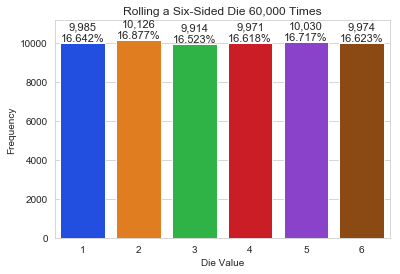

In [14]:
values, frequencies = np.unique( rolls, return_counts = True )
"""
Creating the Initial Bar Plot:

Let's create the bar plot's title, set its style, and 
then graph the die faces and frequencies
"""
# note that the following f-string will include
# the number of die rolls directly in the bar plot's
# title, and the use of a comma format specifier will
# display the number with thousands separators (so that
# a number like 60000 will be displayed as `60,000`)
title = f'Rolling a Six-Sided Die {len(rolls):,} Times' # the :, is the format specifier for thousands

# for other options, see: 
# https://seaborn.pydata.org/generated/seaborn.set_style.html
sns.set_style('whitegrid')


# create and display the bar plot
# see: https://seaborn.pydata.org/generated/seaborn.barplot.html
axes = sns.barplot( x=values, y=frequencies, palette='bright' )


"""
Setting the Window Title and Labeling the x- and y-Axes:

The next two statements add some descriptive text to
the bar plot...
"""
# set the title of the plot (set_title is a *method*
# of the axes object)
axes.set_title(title)

# label the axes
axes.set( xlabel='Die Value', ylabel='Frequency' )


"""
Finalizing the Bar Plot:

The next two statements complete the graph by making 
room for the text above each bar and then displaying it.
"""
# scale the y-axis (by 10%) to add room for text above bars
# (That is, the y-axis is 10% taller than whatever is the
#  height of the tallest plotted bar)
axes.set_ylim( top=max(frequencies) * 1.10 )

# create and display the text for each bar
# (The `patches` collection of the `axes` object contains 
#  2-D colored shapes that represent the plot's bars. 
#  The `for` statement uses `zip` to iterate through the 
#  `patches` and their corresponding `frequency` values.
#  Each iteration unpacks the tuple returned by `zip`
#  into `bar` and `frequency`. To see the official Matplotlib
#  documentation for the properties and methods of Rectangular `patches`, see:
#  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html
for bar, frequency in zip(axes.patches, frequencies):
    text_x = ( bar.get_x() ) + ( bar.get_width() / 2.0 )
    text_y = bar.get_height() 
    text = f'{frequency:,}\n{frequency/len(rolls):.3%}'
    axes.text( text_x, text_y, text, 
               fontsize=11, ha='center', va='bottom' )
    # ha is horizontal align, va is vertical align

In [15]:
%recall 12

In [16]:
rolls = [ random.randrange(1, 7) for i in range(6000000) ]

In [17]:
%recall 14

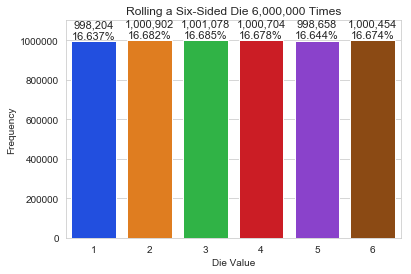

In [18]:
values, frequencies = np.unique( rolls, return_counts = True )
"""
Creating the Initial Bar Plot:

Let's create the bar plot's title, set its style, and 
then graph the die faces and frequencies
"""
# note that the following f-string will include
# the number of die rolls directly in the bar plot's
# title, and the use of a comma format specifier will
# display the number with thousands separators (so that
# a number like 60000 will be displayed as `60,000`)
title = f'Rolling a Six-Sided Die {len(rolls):,} Times' # the :, is the format specifier for thousands

# for other options, see: 
# https://seaborn.pydata.org/generated/seaborn.set_style.html
sns.set_style('whitegrid')


# create and display the bar plot
# see: https://seaborn.pydata.org/generated/seaborn.barplot.html
axes = sns.barplot( x=values, y=frequencies, palette='bright' )


"""
Setting the Window Title and Labeling the x- and y-Axes:

The next two statements add some descriptive text to
the bar plot...
"""
# set the title of the plot (set_title is a *method*
# of the axes object)
axes.set_title(title)

# label the axes
axes.set( xlabel='Die Value', ylabel='Frequency' )


"""
Finalizing the Bar Plot:

The next two statements complete the graph by making 
room for the text above each bar and then displaying it.
"""
# scale the y-axis (by 10%) to add room for text above bars
# (That is, the y-axis is 10% taller than whatever is the
#  height of the tallest plotted bar)
axes.set_ylim( top=max(frequencies) * 1.10 )

# create and display the text for each bar
# (The `patches` collection of the `axes` object contains 
#  2-D colored shapes that represent the plot's bars. 
#  The `for` statement uses `zip` to iterate through the 
#  `patches` and their corresponding `frequency` values.
#  Each iteration unpacks the tuple returned by `zip`
#  into `bar` and `frequency`. To see the official Matplotlib
#  documentation for the properties and methods of Rectangular `patches`, see:
#  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html
for bar, frequency in zip(axes.patches, frequencies):
    text_x = ( bar.get_x() ) + ( bar.get_width() / 2.0 )
    text_y = bar.get_height() 
    text = f'{frequency:,}\n{frequency/len(rolls):.3%}'
    axes.text( text_x, text_y, text, 
               fontsize=11, ha='center', va='bottom' )
    # ha is horizontal align, va is vertical align

### Saving Snippets to a File with the %save Magic 

In [19]:
%save roll_die.py 1-7

The following commands were written to file `roll_die.py`:
# anything starting with % in iPython is a "magic function/command"
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt # this is the conventionally used alias
import numpy as np
import random
import seaborn as sns 
rolls = [ random.randrange(1, 7) for i in range(600) ]
values, frequencies = np.unique( rolls, return_counts = True )
"""
Creating the Initial Bar Plot:

Let's create the bar plot's title, set its style, and 
then graph the die faces and frequencies
"""
# note that the following f-string will include
# the number of die rolls directly in the bar plot's
# title, and the use of a comma format specifier will
# display the number with thousands separators (so that
# a number like 60000 will be displayed as `60,000`)
title = f'Rolling a Six-Sided Die {len(rolls):,} Times' # the :, is the format specifier for thousands

# for other options, see: 
# https://seaborn.pydata.org/generated/seab

In [20]:
%save roll_die_alt.py 1-7 13-18

The following commands were written to file `roll_die_alt.py`:
# anything starting with % in iPython is a "magic function/command"
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt # this is the conventionally used alias
import numpy as np
import random
import seaborn as sns 
rolls = [ random.randrange(1, 7) for i in range(600) ]
values, frequencies = np.unique( rolls, return_counts = True )
"""
Creating the Initial Bar Plot:

Let's create the bar plot's title, set its style, and 
then graph the die faces and frequencies
"""
# note that the following f-string will include
# the number of die rolls directly in the bar plot's
# title, and the use of a comma format specifier will
# display the number with thousands separators (so that
# a number like 60000 will be displayed as `60,000`)
title = f'Rolling a Six-Sided Die {len(rolls):,} Times' # the :, is the format specifier for thousands

# for other options, see: 
# https://seaborn.pydata.org/generated/

In [ ]:
# plt.cla()
# We placed this code in a comment because it was meant for use 
# in an interactive IPython session in which we clear the window,
# then display a new graph in it. In a notebook, we can simply 
# display a new graph inline.

### Command-Line Arguments; Displaying a Plot from a Script
* Provided with this chapter’s examples is an edited version of the `RollDie.py` file you saved above. 
* We added comments and a two modifications so you can run the script with an argument that specifies the number of die rolls, as in:
```python
ipython roll_die_with_argument.py 600
```

* **`sys` module** enables a script to receive _command-line arguments_ that are passed into the program. 
* These include the script’s name and any values that appear to the right of it when you execute the script. 
* The `sys` module’s **`argv`** list contains the arguments. 
* **_Matplotlib and Seaborn do not automatically display the plot for you when you create it in a script_**. So at the end of the script we added the following call to Matplotlib’s **`show`** function, which displays the window containing the graph:
```python
plt.show()
```

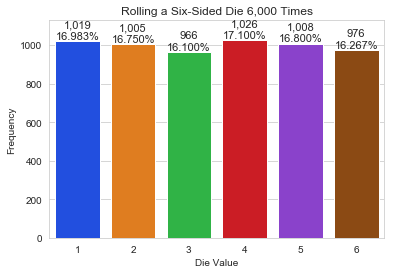

<Figure size 432x288 with 0 Axes>

In [21]:
run roll_die_with_argument.py 6000

### *Self-test questions*

**(Fill in the blank)** The `___________` format specifier indicates that a number should be displayed with thousands operators (e.g., displaying `1000` as `1,000`)

**(Fill in the blank)** A Matplotlib `___________` object manages the content that appears in a Matplotlib window.

**(Fill in the blank)** The Seaborn function `_______` displays data as a bar chart.

**(Fill in the blank)** The Matplotlib function `___________` displays a plot window from a script.

**(Write code)** Use IPython's `%recall` magic command to repeat those steps above that will re-draw the bar plot for 6,000,000 die rolls. (This exercise assumes that you have executed all of the above code snippets.)   

After you plot the new bar chart, you'll notice that the heights of the six bars look the same, although each frequency (count) is close to 1,000,000 and each percentage is close to 16.667%.

In [23]:
%recall 16

In [24]:
rolls = [ random.randrange(1, 7) for i in range(6000000) ]

In [25]:
%recall 7

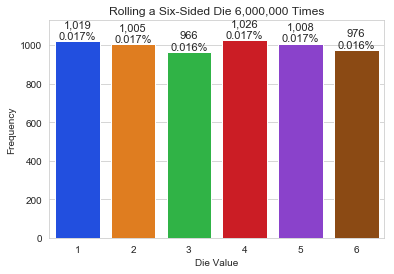

In [26]:
"""
Creating the Initial Bar Plot:

Let's create the bar plot's title, set its style, and 
then graph the die faces and frequencies
"""
# note that the following f-string will include
# the number of die rolls directly in the bar plot's
# title, and the use of a comma format specifier will
# display the number with thousands separators (so that
# a number like 60000 will be displayed as `60,000`)
title = f'Rolling a Six-Sided Die {len(rolls):,} Times' # the :, is the format specifier for thousands

# for other options, see: 
# https://seaborn.pydata.org/generated/seaborn.set_style.html
sns.set_style('whitegrid')


# create and display the bar plot
# see: https://seaborn.pydata.org/generated/seaborn.barplot.html
axes = sns.barplot( x=values, y=frequencies, palette='bright' )


"""
Setting the Window Title and Labeling the x- and y-Axes:

The next two statements add some descriptive text to
the bar plot...
"""
# set the title of the plot (set_title is a *method*
# of the axes object)
axes.set_title(title)

# label the axes
axes.set( xlabel='Die Value', ylabel='Frequency' )


"""
Finalizing the Bar Plot:

The next two statements complete the graph by making 
room for the text above each bar and then displaying it.
"""
# scale the y-axis (by 10%) to add room for text above bars
# (That is, the y-axis is 10% taller than whatever is the
#  height of the tallest plotted bar)
axes.set_ylim( top=max(frequencies) * 1.10 )

# create and display the text for each bar
# (The `patches` collection of the `axes` object contains 
#  2-D colored shapes that represent the plot's bars. 
#  The `for` statement uses `zip` to iterate through the 
#  `patches` and their corresponding `frequency` values.
#  Each iteration unpacks the tuple returned by `zip`
#  into `bar` and `frequency`. To see the official Matplotlib
#  documentation for the properties and methods of Rectangular `patches`, see:
#  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html
for bar, frequency in zip(axes.patches, frequencies):
    text_x = ( bar.get_x() ) + ( bar.get_width() / 2.0 )
    text_y = bar.get_height() 
    text = f'{frequency:,}\n{frequency/len(rolls):.3%}'
    axes.text( text_x, text_y, text, 
               fontsize=11, ha='center', va='bottom' )
    # ha is horizontal align, va is vertical align

------

# All done!   

### By the way, there's an easy way to get a quick reference of things you can do in IPython (and for those of you who have used Linux or UNIX-like operating systems before, some of these may be particularly useful, or at least familiar). Try executing the magic command `%quickref` below:

In [27]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co